#### Imports

In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf

#### Function that Saves Stock Data to CSV

In [7]:
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    df = web.DataReader(ticker, 'yahoo', start, end)
# Saving the file from internet to the computer (to file path Ctrl+L in the folder)
    df.to_csv("/home/johnson/DSML/Finance.py/" + ticker + ".csv")
    return df
# Test with the test function.

#### Function that Returns a Dataframe from CSV

In [10]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv("/home/johnson/DSML/Finance.py/" + ticker + ".csv")

    except FileNotFoundError:
        print("File doesn't Exists")
    else:
        return df

#### Add Daily Return to Dataframe

In [12]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price or (EP/BP)-1

def add_daily_return_to_df(df, ticker):
     df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
     df.to_csv("/home/johnson/DSML/Finance.py/" + ticker + ".csv")
     return df

#### Returns Total Return over Time

In [18]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear} - {smonth} - {sday}"
    end = f"{eyear} - {emonth} - {eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    mask = (df['Date'] >= start) & (df['Date'] <=end) 
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    return(days * daily_ret)

#### Matplotlib Finance

In [23]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear} - {smonth} - {sday}"
    end = f"{eyear} - {emonth} - {eday}"
    try:
        df = pd.read_csv("/home/johnson/DSML/Finance.py/" + ticker + ".csv")

    except FileNotFoundError:
        print("File doesn't Exists")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub, type = 'candle')
        mpf.plot(df_sub, type = 'line')
        mpf.plot(df_sub, type = 'ohlc', mav = 4)

        s = mpf.make_mpf_style(base_mpf_style = 'charles', rc = {'font.size': 8})
        fig = mpf.figure(figsize=(12, 8), style = s)
        ax = fig.add_subplot(2, 1, 2)
        av = fig.add_subplot(2, 1, 2, sharex = ax)
        mpf.plot(df_sub, type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)


#### Simple Price Plot

In [32]:
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear} - {smonth} - {sday}"
    end = f"{eyear} - {emonth} - {eday}"
    try:
        df = pd.read_csv("/home/johnson/DSML/Finance.py/" + ticker + ".csv")

    except FileNotFoundError:
        print("File doesn't Exists")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        df_np = df_sub.to_numpy()
        np_adj_close = df_np[:,5]
        date_arr = df_np[:,1]
        fig = plt.figure(figsize=(10, 6), dpi = 100)
        axes = fig.add_axes([0,0,1,1])
        axes.plot(date_arr, np_adj_close, color='navy')
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        axes.grid(True, color = '0.6', dashes = (5, 2))
        axes.set_facecolor('#FAEBD7')

#### Download Multiple Stocks

In [41]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

#### Merge Multiple Stocks in One Dataframe by Column Name

In [58]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
        
    return mult_df

#### Get Changing Value of Investment using Multiple Stocks

In [49]:
def plot_return_mult_stocks(investments, stock_df):
    (stock_df/stock_df.iloc[0] * investments).plot(figsize=(15, 6))

#### Get Standard Deviation for Multiple Stocks

In [74]:
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [75]:
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd/mean
        print("stock: {:4} Mean: {:7.2f} Standard Deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

#### Test Function

Total Return:  0.05249787088944713


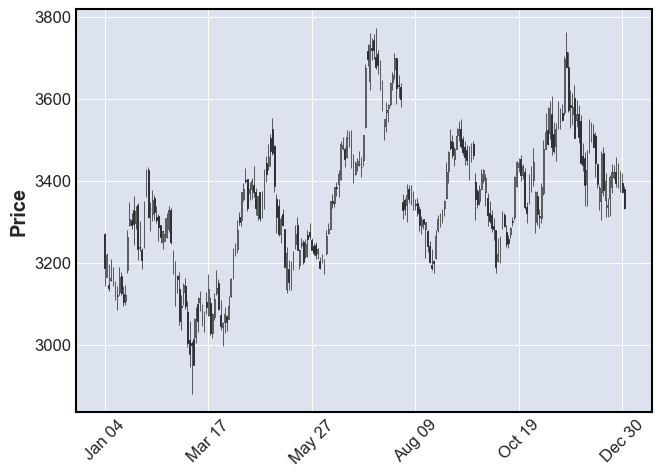

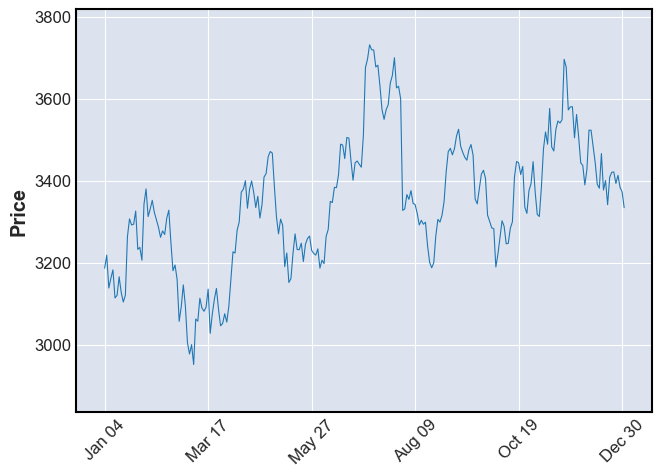

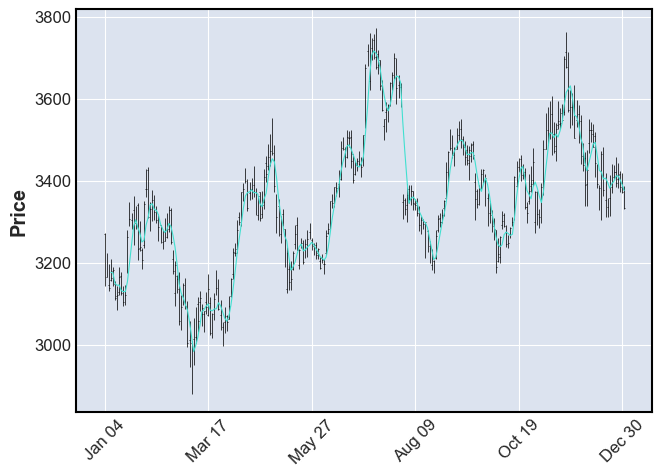

stock: FB   Mean:  320.98 Standard Deviation: 34.92
Coefficient of Variation: 0.10877886720423685

stock: AMZN Mean: 3343.52 Standard Deviation: 159.82
Coefficient of Variation: 0.04779915494727833

stock: AAPL Mean:  140.40 Standard Deviation: 14.80
Coefficient of Variation: 0.10543567871581713

stock: NFLX Mean:  558.15 Standard Deviation: 55.90
Coefficient of Variation: 0.10015603518867211

stock: GOOG Mean: 2507.61 Standard Deviation: 369.66
Coefficient of Variation: 0.147416977910337



,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-12-31,273.160004,3256.929932,131.709213,540.729980,1751.880005
2021-01-04,268.940002,3186.629883,128.453445,522.859985,1728.239990
2021-01-05,270.970001,3218.510010,130.041626,520.799988,1740.920044
2021-01-06,263.309998,3138.379883,125.664215,500.489990,1735.290039
2021-01-07,268.739990,3162.159912,129.952286,508.890015,1787.250000
...,...,...,...,...,...
2021-12-27,346.179993,3393.389893,180.100540,613.119995,2961.280029
2021-12-28,346.220001,3413.219971,179.061859,610.710022,2928.959961
2021-12-29,342.940002,3384.020020,179.151749,610.539978,2930.090088


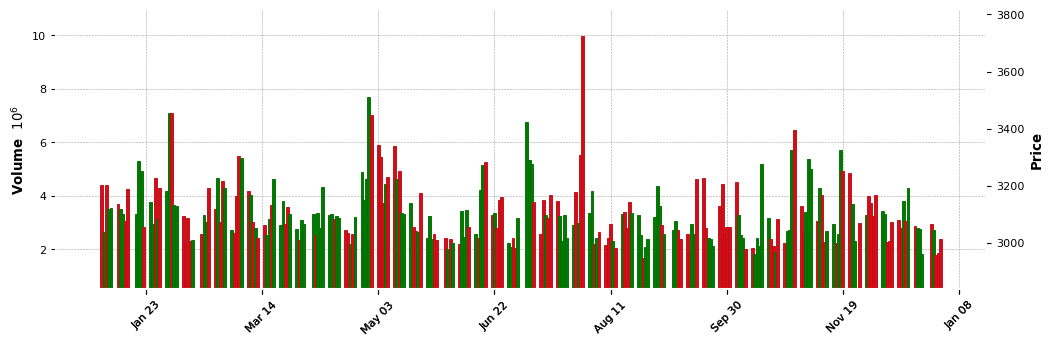

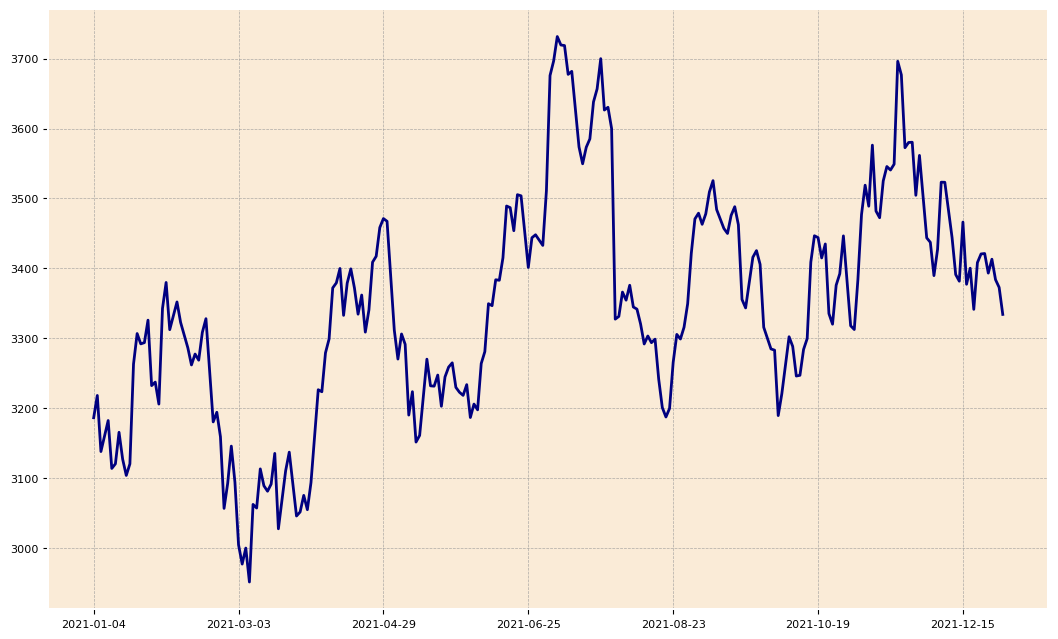

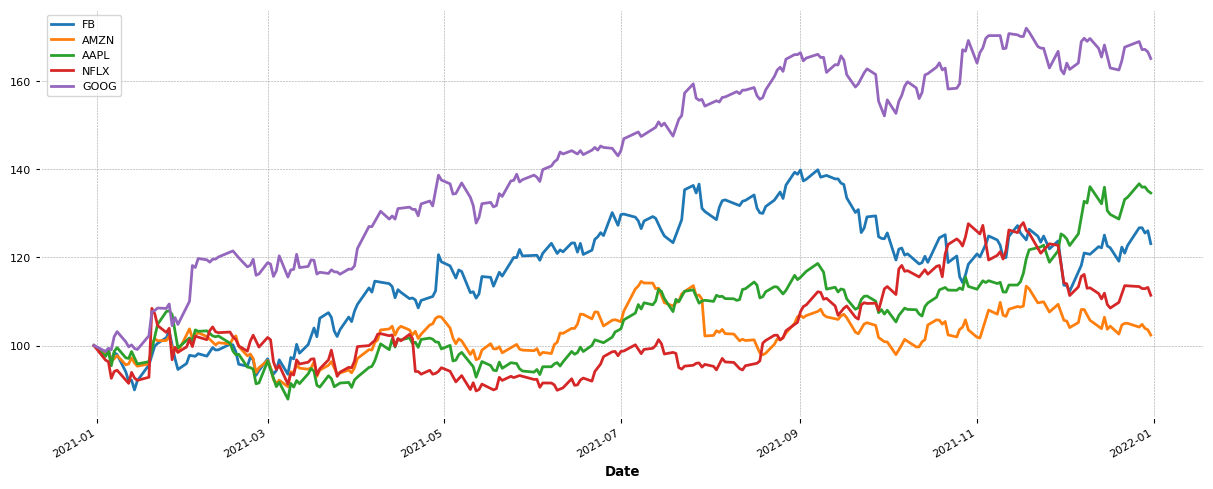

In [77]:
save_to_csv_from_yahoo('AMZN', 2021, 1, 1, 2022, 1, 1)

AMZN = get_df_from_csv('AMZN')

add_daily_return_to_df(AMZN, 'AMZN')

AMZN
tot_ret = get_return_defined_time(AMZN, 2021, 1, 1, 2022, 1, 1)
print("Total Return: ", tot_ret)

mplfinance_plot('AMZN', 'ohlc', 2021, 1, 1, 2022, 1, 1)

price_plot('AMZN', 2021, 1, 1, 2022, 1, 1)

tickers = ["FB", "AAPL", "NFLX", "GOOG"]
# download_multiple_stocks(2021, 1, 1, 2022, 1, 1, *tickers)

tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('Adj Close', 2021, 1, 1, 2022, 1, 1, *tickers)
plot_return_mult_stocks(100, mult_df)

get_mult_stock_mean_sd(mult_df)
mult_df